# Loading libraries

In [1]:
import gzip
import json
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading datasets

## Reviews dataset

In [2]:
# Specify the path to your Parquet file
reviews_file = '/Users/ShanShan/BT4301/MySQL/test/cleaned/results2/book_reviews_with_sentiment_final.csv'

# Read the Parquet file into a pandas DataFrame
reviews_df = pd.read_csv(reviews_file)

In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310329 entries, 0 to 1310328
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   rating             1310329 non-null  float64
 1   title              1310285 non-null  object 
 2   text               1310308 non-null  object 
 3   parent_asin        1310329 non-null  object 
 4   user_id            1310329 non-null  object 
 5   timestamp          1310329 non-null  int64  
 6   verified_purchase  1310329 non-null  bool   
 7   sentiment_score    1310329 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 71.2+ MB


In [4]:
reviews_df.shape

(1310329, 8)

In [5]:
reviews_df.columns

Index(['rating', 'title', 'text', 'parent_asin', 'user_id', 'timestamp',
       'verified_purchase', 'sentiment_score'],
      dtype='object')

In [6]:
# Display the first few rows
reviews_df.head()

,rating,title,text,parent_asin,user_id,timestamp,verified_purchase,sentiment_score
0,5.0,Beware....,Another fun story in the series. Jessica has h...,B0871P5Q8P,AFFZVSTUS3U2ZD22A2NPZSKOCPGQ,1588609906893,True,0.970070
1,5.0,Action page turner,This is such a good read..a real page turner!!...,B07YZPBN4T,AFFZVSTUS3U2ZD22A2NPZSKOCPGQ,1587964626726,True,0.994910
2,5.0,"Strong seals, strong women",What an amazing storyline. Murph is the main m...,B0859J266D,AFFZVSTUS3U2ZD22A2NPZSKOCPGQ,1586927648767,True,0.999575
3,5.0,Another award winner for this author.,This story was much better than I expected..an...,B07R5CL3P1,AFFZVSTUS3U2ZD22A2NPZSKOCPGQ,1575174798385,True,0.620722
4,5.0,Wonderful story!!!,Well just when you think this series cant get ...,B07XTQ39VK,AFFZVSTUS3U2ZD22A2NPZSKOCPGQ,1573664213687,True,0.994292


## Meta dataset

In [7]:
# Specify the path to your Parquet file
meta_parquet_file = '/Users/ShanShan/BT4301/MySQL/test/cleaned/results2/books_metadata.csv'

# Read the Parquet file into a pandas DataFrame
meta_df = pd.read_csv(meta_parquet_file)

In [8]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591371 entries, 0 to 1591370
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   title             1591371 non-null  object 
 1   average_rating    1591371 non-null  float64
 2   rating_number     1591371 non-null  int64  
 3   price             1375812 non-null  object 
 4   parent_asin       1591371 non-null  object 
 5   author            1591060 non-null  object 
 6   genre             1591371 non-null  object 
 7   publisher         994493 non-null   object 
 8   publication_date  1532776 non-null  object 
 9   language          1533286 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 121.4+ MB


In [9]:
meta_df.shape

(1591371, 10)

In [10]:
meta_df.columns

Index(['title', 'average_rating', 'rating_number', 'price', 'parent_asin',
       'author', 'genre', 'publisher', 'publication_date', 'language'],
      dtype='object')

In [11]:
# Display the first few rows
meta_df.head()

,title,average_rating,rating_number,price,parent_asin,author,genre,publisher,publication_date,language
0,The Palace (Chateau Book 4),4.7,970,0.0,B08XPZPFY4,Penelope Sky,Romance,"Hartwick Publishing (May 25, 2021)","May 25, 2021",English
1,Microsoft PowerPoint 2016 2013 2010 2007 Tips ...,4.3,35,0.0,B07DH1LF1K,Amelia Griggs,Computers & Technology,NaN,"June 2, 2018",English
2,Ill Wind (Anna Pigeon Mysteries Book 3),4.4,1628,7.99,B0022Q8CTQ,Nevada Barr,"Mystery, Thriller & Suspense","Berkley; Reissue edition (March 29, 2009)","March 29, 2009",English
3,30 Healthy Easy Quick Lentil Recipes (Brad Arm...,3.8,47,0.0,B00BS56MLC,Brad Armstrong,"Health, Fitness & Dieting","Brad Armstrong (March 10, 2013)","March 10, 2013",English
4,The Road Home,4.5,475,10.44,B00155EZRS,Jim Harrison,Literature & Fiction,"Atlantic Monthly Press (December 1, 2007)","December 1, 2007",English


# Check for missing values

## Reviews dataset

In [12]:
# Check for missing values
reviews_df.isnull().sum()

rating                0
title                44
text                 21
parent_asin           0
user_id               0
timestamp             0
verified_purchase     0
sentiment_score       0
dtype: int64

## Meta dataset

In [13]:
# Check for missing values
meta_df.isnull().sum()

title                    0
average_rating           0
rating_number            0
price               215559
parent_asin              0
author                 311
genre                    0
publisher           596878
publication_date     58595
language             58085
dtype: int64

# Check for duplicated values

## Reviews dataset

In [14]:
# reviews_df_duplicates = reviews_df.duplicated().sum()

# print("Number of duplicates in dataset:", reviews_df_duplicates)

In [15]:
# # Identify duplicate rows (considering all columns)
# reviews_duplicate_rows = reviews_df[reviews_df.duplicated(keep=False)]

# print("Duplicate rows in the dataset:\n", reviews_duplicate_rows)

In [16]:
# # Filter for rows where 'verified_purchase' is FALSE
# reviews_duplicate_rows_unverified = reviews_duplicate_rows[reviews_duplicate_rows["verified_purchase"] == False]

# # Print the filtered duplicate rows
# print("Duplicate rows where 'verified_purchase' is FALSE:\n", reviews_duplicate_rows_unverified)

Drop the duplicate rows

In [17]:
# # Drop these rows from the original dataframe
# reviews_df_noduplicates_verified = reviews_df.drop(reviews_duplicate_rows_unverified.index)

# # Reset index for cleanliness (optional)
# reviews_df_noduplicates_verified = reviews_df_noduplicates_verified.reset_index(drop=True)

# # Check the new count of duplicates to confirm removal
# print("Number of duplicates after dropping: ", reviews_df_noduplicates_verified.duplicated().sum())

In [18]:
# # Drop duplicates while keeping the first occurrence
# reviews_df = reviews_df.drop_duplicates()

# # Check the new count of duplicates to confirm removal
# print("Number of duplicates after dropping: ", reviews_df.duplicated().sum())

## Meta dataset

In [19]:
# Identify columns that contain unhashable types (lists)
for col in meta_df.columns:
    if meta_df[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains lists")

In [20]:
# Convert list-like columns to tuples (hashable type)
meta_df_separate = meta_df.apply(lambda col: col.map(lambda x: tuple(x) if isinstance(x, list) else x))

In [21]:
meta_df_duplicates = meta_df_separate.duplicated().sum()
print("Number of duplicates in dataset: ", meta_df_duplicates)

Number of duplicates in dataset:  0


# Describing dataset

## Reviews dataset

In [22]:
reviews_df.describe()

,rating,timestamp,sentiment_score
count,1.310329e+06,1.310329e+06,1.310329e+06
mean,4.542574e+00,1.616654e+12,8.562377e-01
std,8.846099e-01,3.944997e+10,3.353927e-01
min,1.000000e+00,1.546301e+12,1.660585e-04
25%,4.000000e+00,1.583061e+12,9.958175e-01
50%,5.000000e+00,1.619047e+12,9.996395e-01
75%,5.000000e+00,1.649959e+12,9.998422e-01
max,5.000000e+00,1.694615e+12,9.998949e-01


## Meta dataset

In [23]:
meta_df.describe()

,average_rating,rating_number
count,1.591371e+06,1.591371e+06
mean,4.306478e+00,3.774429e+02
std,5.500675e-01,2.536585e+03
min,1.000000e+00,1.000000e+00
25%,4.100000e+00,9.000000e+00
50%,4.400000e+00,3.400000e+01
75%,4.600000e+00,1.590000e+02
max,5.000000e+00,6.104760e+05


# Distribution of columns in Reviews dataset

## rating

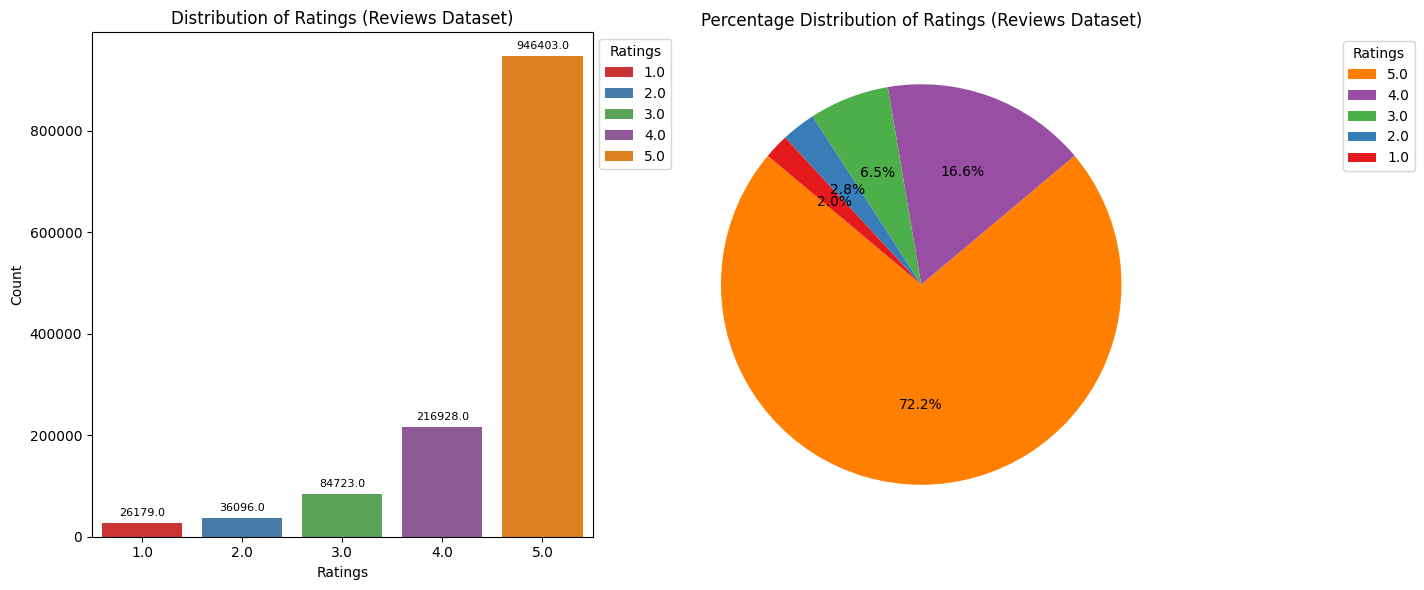

In [24]:
# Set up the plot for Reviews countplot
plt.figure(figsize=(14, 6))

# Get unique ratings dynamically from reviews_df
unique_ratings_reviews_df = sorted(reviews_df['rating'].dropna().unique())  
set1_colors_reviews_df = sns.color_palette("Set1", n_colors=len(unique_ratings_reviews_df))

# Create a mapping of ratings to colors
rating_colors_reviews_df = {rating: color for rating, color in zip(unique_ratings_reviews_df, set1_colors_reviews_df)}

# Plot the countplot with hue set to 'rating'
ax_reviews_df = plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=reviews_df, hue='rating', palette=rating_colors_reviews_df)

# Add title and labels
plt.title("Distribution of Ratings (Reviews Dataset)")
plt.xlabel("Ratings")  
plt.ylabel("Count")    

# Add number on top of each bar
for p in ax_reviews_df.patches:
    height = p.get_height()
    if height > 0:
        ax_reviews_df.annotate(f'{height}', 
                            (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='baseline',
                            fontsize=8, color='black', xytext=(0, 5), 
                            textcoords='offset points')

# Show legend outside the plot
plt.legend(title='Ratings', loc='upper left', bbox_to_anchor=(1, 1))

# Create a pie chart for the percentage distribution of ratings
plt.subplot(1, 2, 2)
rating_counts_reviews_df = reviews_df['rating'].value_counts()
wedges_reviews_df, texts_reviews_df, autotexts_reviews_df = plt.pie(
    rating_counts_reviews_df, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=[rating_colors_reviews_df[rating] for rating in rating_counts_reviews_df.index]
)

# Add title for the pie chart
plt.title("Percentage Distribution of Ratings (Reviews Dataset)")

# Create a legend
plt.legend(wedges_reviews_df, rating_counts_reviews_df.index, title="Ratings", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and show the plot
plt.tight_layout()  
plt.show()

## verified_purchase

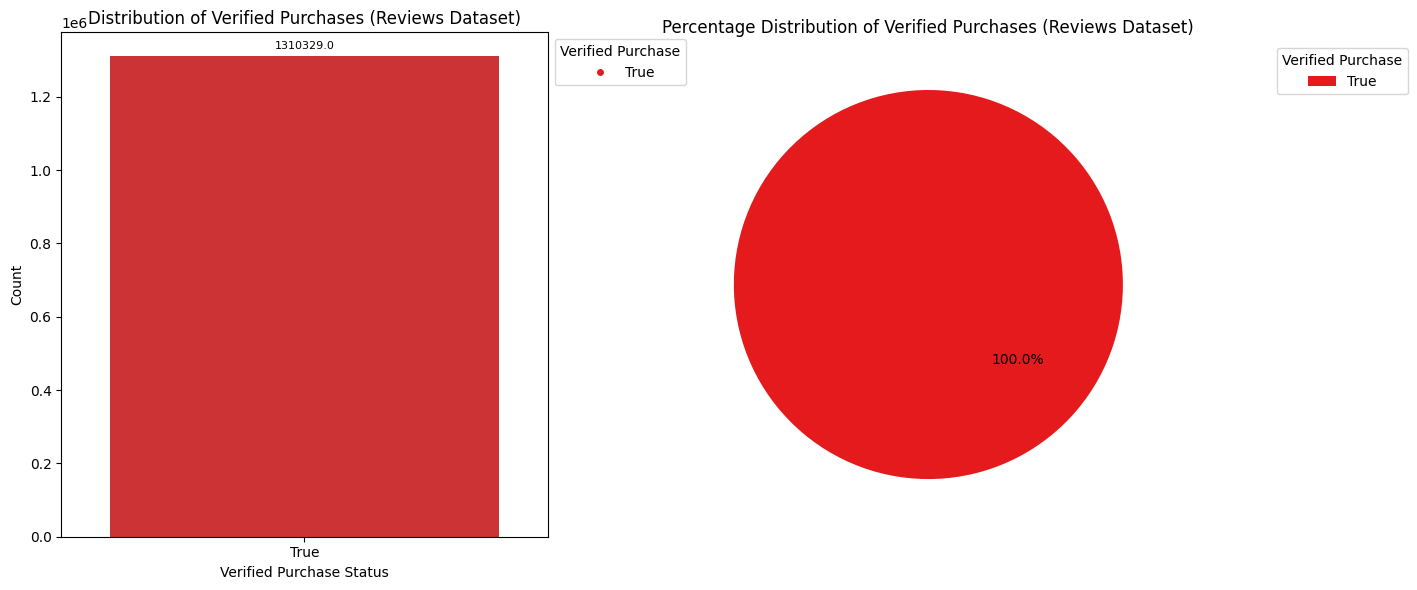

In [25]:
# Choose a color palette for verified purchase dataset
unique_verified_purchase_reviews = reviews_df['verified_purchase'].unique()
colors_verified_purchase_reviews = sns.color_palette("Set1", n_colors=len(unique_verified_purchase_reviews))

# Create a dictionary to map each verified purchase category to its corresponding color
verified_purchase_color_map_reviews = dict(zip(unique_verified_purchase_reviews, colors_verified_purchase_reviews))

# Set up the plot for Verified Purchase countplot and pie chart
plt.figure(figsize=(14, 6))

# Plot the countplot with hue for verified purchases in reviews_df
ax_verified_purchase_reviews = plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x='verified_purchase', data=reviews_df, hue='verified_purchase', palette=verified_purchase_color_map_reviews)

# Add title
plt.title("Distribution of Verified Purchases (Reviews Dataset)")

# Add axis labels
plt.xlabel("Verified Purchase Status")  
plt.ylabel("Count")                

# Add number on top of each bar
for p in ax_verified_purchase_reviews.patches:
    height = p.get_height()
    if height > 0:
        ax_verified_purchase_reviews.annotate(f'{height}', 
                                              (p.get_x() + p.get_width() / 2., height), 
                                              ha='center', va='baseline',
                                              fontsize=8, color='black', xytext=(0, 5), 
                                              textcoords='offset points')

# Manually create legend for the countplot
handles_verified_purchase_reviews = [plt.Line2D([0], [0], marker='o', color='w', label=str(status), 
                                                 markerfacecolor=verified_purchase_color_map_reviews[status]) 
                                     for status in unique_verified_purchase_reviews]
plt.legend(handles=handles_verified_purchase_reviews, title='Verified Purchase', loc='upper left', bbox_to_anchor=(1, 1))

# Create a pie chart for the percentage distribution of verified purchases
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
verified_purchase_counts_reviews = reviews_df['verified_purchase'].value_counts()
wedges_verified_purchase_reviews, texts_verified_purchase_reviews, autotexts_verified_purchase_reviews = plt.pie(
    verified_purchase_counts_reviews, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=[verified_purchase_color_map_reviews[status] for status in verified_purchase_counts_reviews.index]
)

# Add title for the pie chart
plt.title("Percentage Distribution of Verified Purchases (Reviews Dataset)")

# Create a legend with the corresponding colors for the pie chart
plt.legend(wedges_verified_purchase_reviews, verified_purchase_counts_reviews.index, title="Verified Purchase", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and show the plot
plt.tight_layout()  
plt.show()

## helpful_vote

In [26]:
# # Set up the Seaborn style
# sns.set(style="whitegrid")

# # Create the figure
# plt.figure(figsize=(10, 5))

# # Plot histogram for helpful_vote in reviews_df
# hist_plot_helpful_vote = sns.histplot(reviews_df['helpful_vote'], bins=30, kde=True, color='cornflowerblue')

# # Set title and labels
# plt.title("Distribution of Helpful Vote (Reviews Dataset)", fontsize=16)
# plt.xlabel("Helpful Vote", fontsize=14)
# plt.ylabel("Frequency", fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# # Add counts on top of each bar
# for p in hist_plot_helpful_vote.patches:
#     height = p.get_height()
#     if height > 0:  # Only annotate bars that are non-zero
#         hist_plot_helpful_vote.annotate(f'{int(height)}', 
#                                         (p.get_x() + p.get_width() / 2., height), 
#                                         ha='center', va='baseline', fontsize=8, color='black', 
#                                         xytext=(0, 5), textcoords='offset points')

# # Show the plot
# plt.show()


In [27]:
# # Set up the Seaborn style
# sns.set(style="whitegrid")

# # Define a unique variable name for the column
# helpful_vote_column = reviews_df['helpful_vote']

# # Calculate Q1 (25th percentile) and Q3 (75th percentile)
# Q1_helpful_vote = helpful_vote_column.quantile(0.25)
# Q3_helpful_vote = helpful_vote_column.quantile(0.75)

# # Compute Interquartile Range (IQR)
# IQR_helpful_vote = Q3_helpful_vote - Q1_helpful_vote

# # Define lower and upper bounds for outliers
# lower_bound_helpful_vote = Q1_helpful_vote - 1.5 * IQR_helpful_vote
# upper_bound_helpful_vote = Q3_helpful_vote + 1.5 * IQR_helpful_vote

# # Identify outliers
# outliers_helpful_vote = reviews_df[
#     (helpful_vote_column < lower_bound_helpful_vote) | 
#     (helpful_vote_column > upper_bound_helpful_vote)
# ]

# # Display the outliers
# print(f"Number of outliers in helpful_vote: {len(outliers_helpful_vote)}")

# # Remove outliers based on IQR method
# reviews_df_helpful_vote_no_outliers = reviews_df[
#     (helpful_vote_column >= lower_bound_helpful_vote) & 
#     (helpful_vote_column <= upper_bound_helpful_vote)
# ]

# # Confirm removal
# print(f"Number of rows after removing outliers: {len(reviews_df_helpful_vote_no_outliers)}")

# # Create subplots for boxplots with and without outliers
# fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# # Boxplot with outliers
# sns.boxplot(x=helpful_vote_column, color='lightcoral', ax=axes[0])
# axes[0].set_title("Boxplot of Helpful Vote (With Outliers)", fontsize=14)
# axes[0].set_xlabel("Helpful Vote", fontsize=12)

# # Boxplot without outliers
# sns.boxplot(x=reviews_df_helpful_vote_no_outliers['helpful_vote'], color='lightcoral', ax=axes[1])
# axes[1].set_title("Boxplot of Helpful Vote (Without Outliers)", fontsize=14)
# axes[1].set_xlabel("Helpful Vote", fontsize=12)

# # Display the plots side by side
# plt.tight_layout()
# plt.show()

In [28]:
# # Set up the Seaborn style
# sns.set(style="whitegrid")

# # Create the figure
# plt.figure(figsize=(10, 5))

# # Plot histogram for helpful_vote without outliers
# hist_plot_helpful_vote_no_outliers = sns.histplot(reviews_df_helpful_vote_no_outliers['helpful_vote'], bins=30, kde=True, color='cornflowerblue')

# # Set title and labels
# plt.title("Distribution of Helpful Vote Without Outliers (Reviews Dataset)", fontsize=16)
# plt.xlabel("Helpful Vote", fontsize=14)
# plt.ylabel("Frequency", fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# # Add counts on top of each bar
# for p in hist_plot_helpful_vote_no_outliers.patches:
#     height = p.get_height()
#     if height > 0:  # Only annotate bars that are non-zero
#         hist_plot_helpful_vote_no_outliers.annotate(f'{int(height)}', 
#                                                    (p.get_x() + p.get_width() / 2., height), 
#                                                    ha='center', va='baseline', fontsize=8, color='black', 
#                                                    xytext=(0, 5), textcoords='offset points')

# # Show the plot
# plt.show()

## timestamp

In [29]:
# Convert timestamp from milliseconds to datetime
reviews_df['date'] = pd.to_datetime(reviews_df['timestamp'], unit='ms')

# Extract Year, Month, and Day into new columns
reviews_df['year'] = reviews_df['date'].dt.year
reviews_df['month'] = reviews_df['date'].dt.month
reviews_df['day'] = reviews_df['date'].dt.day


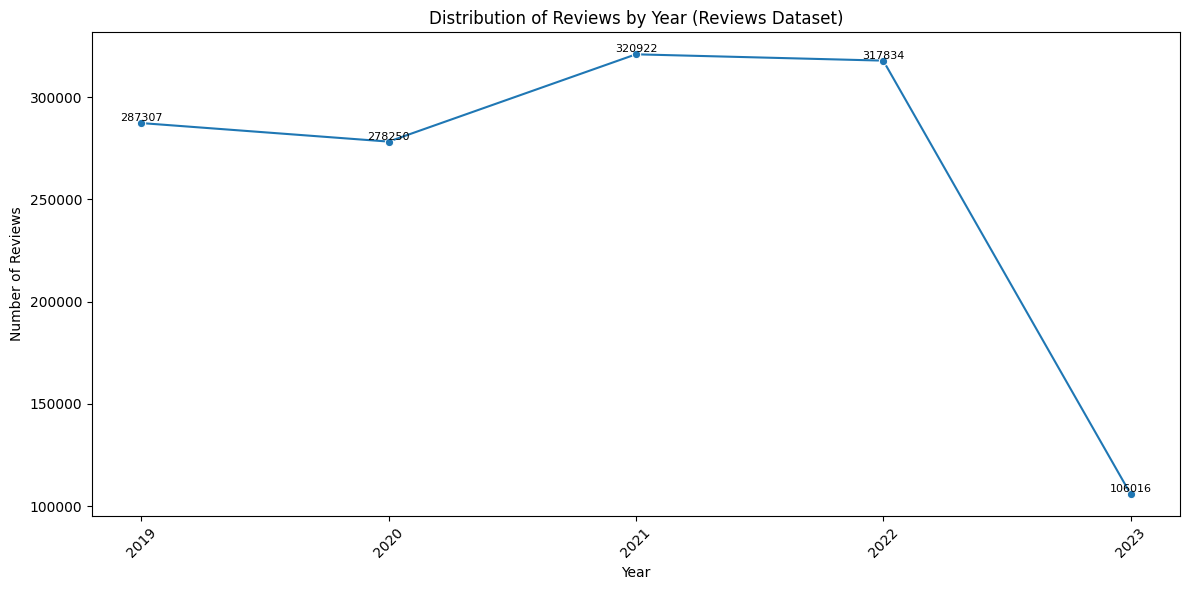

In [30]:
# Count the number of reviews per year
reviews_per_year = reviews_df['year'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=reviews_per_year.index, y=reviews_per_year.values, marker='o')

# Add title and labels
plt.title("Distribution of Reviews by Year (Reviews Dataset)")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")

# Annotate each point with the review count
for x, y in zip(reviews_per_year.index, reviews_per_year.values):
    plt.text(x, y, str(y), fontsize=8, ha='center', va='bottom')

# Format x-axis to display all years clearly
plt.xticks(reviews_per_year.index, rotation=45)

# Show plot
plt.tight_layout()
plt.show()

# Distribution of columns in Meta dataset

## average_rating

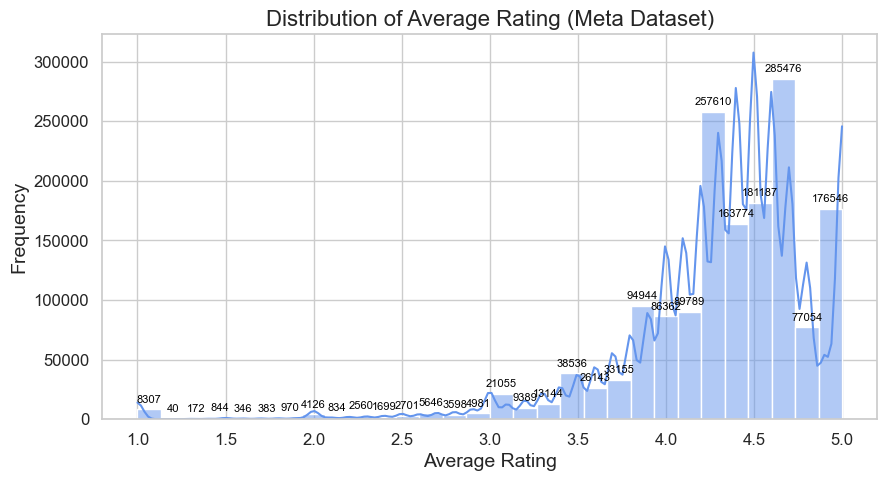

In [31]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 5))

# Plot histogram for average_rating in meta_df
hist_plot_avg_rating = sns.histplot(meta_df['average_rating'], bins=30, kde=True, color='cornflowerblue')

# Set title and labels
plt.title("Distribution of Average Rating (Meta Dataset)", fontsize=16)
plt.xlabel("Average Rating", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add counts on top of each bar
for p in hist_plot_avg_rating.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars that are non-zero
        hist_plot_avg_rating.annotate(f'{int(height)}', 
                                      (p.get_x() + p.get_width() / 2., height), 
                                      ha='center', va='baseline', fontsize=8, color='black', 
                                      xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

## rating_number

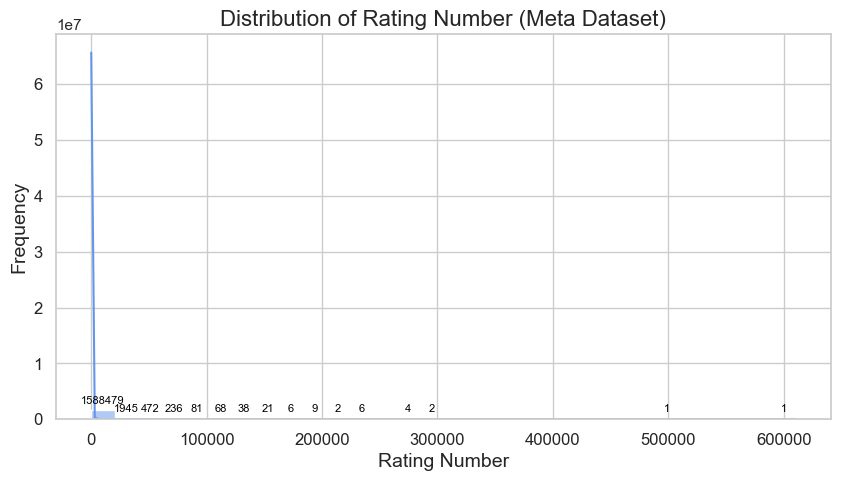

In [32]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 5))

# Plot histogram for rating_number in meta_df
hist_plot_rating_number = sns.histplot(meta_df['rating_number'], bins=30, kde=True, color='cornflowerblue')

# Set title and labels
plt.title("Distribution of Rating Number (Meta Dataset)", fontsize=16)
plt.xlabel("Rating Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add counts on top of each bar
for p in hist_plot_rating_number.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars that are non-zero
        hist_plot_rating_number.annotate(f'{int(height)}', 
                                         (p.get_x() + p.get_width() / 2., height), 
                                         ha='center', va='baseline', fontsize=8, color='black', 
                                         xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


## price

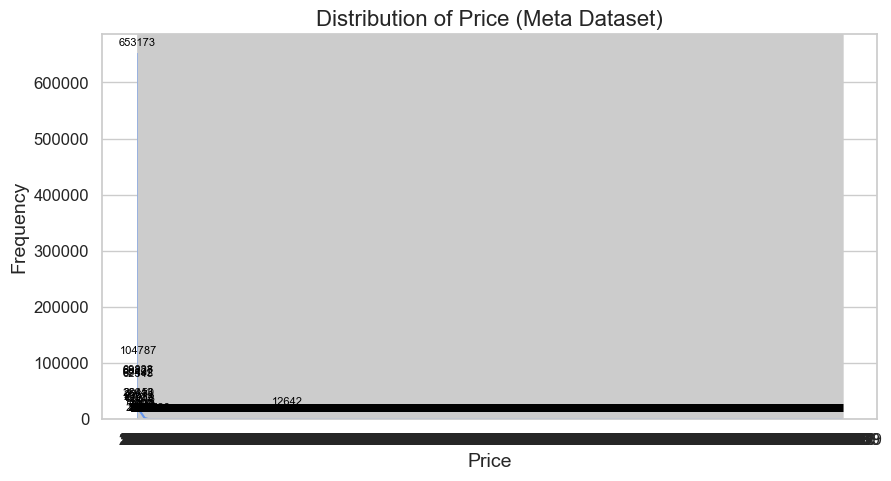

In [33]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 5))

# Plot histogram for price in meta_df
hist_plot_price = sns.histplot(meta_df['price'], bins=30, kde=True, color='cornflowerblue')

# Set title and labels
plt.title("Distribution of Price (Meta Dataset)", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add counts on top of each bar
for p in hist_plot_price.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars that are non-zero
        hist_plot_price.annotate(f'{int(height)}', 
                                 (p.get_x() + p.get_width() / 2., height), 
                                 ha='center', va='baseline', fontsize=8, color='black', 
                                 xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

## print_length

In [34]:
# # Set up the Seaborn style
# sns.set(style="whitegrid")

# # Create the figure
# plt.figure(figsize=(10, 5))

# # Plot histogram for print_length in meta_df
# hist_plot_print_length = sns.histplot(meta_df['print_length'], bins=30, kde=True, color='cornflowerblue')

# # Set title and labels
# plt.title("Distribution of Print Length (Meta Dataset)", fontsize=16)
# plt.xlabel("Print Length", fontsize=14)
# plt.ylabel("Frequency", fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# # Add counts on top of each bar
# for p in hist_plot_print_length.patches:
#     height = p.get_height()
#     if height > 0:  # Only annotate bars that are non-zero
#         hist_plot_print_length.annotate(f'{int(height)}', 
#                                         (p.get_x() + p.get_width() / 2., height), 
#                                         ha='center', va='baseline', fontsize=8, color='black', 
#                                         xytext=(0, 5), textcoords='offset points')

# # Show the plot
# plt.show()


# MAB

In [35]:
class ReplaySimulator(object):
    def __init__(self, n_visits, reward_history, item_col_name, visitor_col_name, reward_col_name, n_iterations=1, random_seed=1):
        # Set the random seed for reproducibility
        np.random.seed(random_seed)

        # Store input data and parameters
        self.reward_history = reward_history
        self.item_col_name = item_col_name
        self.visitor_col_name = visitor_col_name
        self.reward_col_name = reward_col_name

        # Number of visits to replay/simulate
        self.n_visits = n_visits

        # Number of runs to average over
        self.n_iterations = n_iterations

        # Items under test
        self.items = self.reward_history[self.item_col_name].unique()
        self.n_items = len(self.items)

        # Visitors in the historical reward_history
        self.visitors = self.reward_history[self.visitor_col_name].unique()
        self.n_visitors = len(self.visitors)

    def reset(self):
        # Initialize counters for item samples and rewards
        self.n_item_samples = np.zeros(self.n_items)
        self.n_item_rewards = np.zeros(self.n_items)

    def replay(self):
        # Store simulation results
        results = []

        for iteration in tqdm(range(0, self.n_iterations)):
            # Reset counters for each iteration
            self.reset()

            total_rewards = 0
            fraction_relevant = np.zeros(self.n_visits)

            for visit in range(0, self.n_visits):
                found_match = False
                while not found_match:
                    # Choose a random visitor
                    visitor_idx = np.random.randint(self.n_visitors)
                    visitor_id = self.visitors[visitor_idx]

                    # Select an item to offer the visitor
                    item_idx = self.select_item()
                    item_id = self.items[item_idx]

                    # Check if this interaction exists in the history
                    reward = self.reward_history.query(
                        '{} == @item_id and {} == @visitor_id'.format(self.item_col_name, self.visitor_col_name))[self.reward_col_name]

                    found_match = reward.shape[0] > 0

                reward_value = reward.iloc[0]

                self.record_result(visit, item_idx, reward_value)

                # Record metrics
                total_rewards += reward_value
                fraction_relevant[visit] = total_rewards * 1. / (visit + 1)

                result = {}
                result['iteration'] = iteration
                result['visit'] = visit
                result['item_id'] = item_id
                result['visitor_id'] = visitor_id
                result['reward'] = reward_value
                result['total_reward'] = total_rewards
                result['fraction_relevant'] = total_rewards * 1. / (visit + 1)

                results.append(result)

        return results

    def select_item(self):
        # This method selects an item randomly
        return np.random.randint(self.n_items)

    def record_result(self, visit, item_idx, reward):
        # This method records the result of an interaction and updates item statistics

        # Update the number of times the item has been sampled
        self.n_item_samples[item_idx] += 1

        # Update the fraction of time the item has resulted in a reward
        alpha = 1. / self.n_item_samples[item_idx]
        self.n_item_rewards[item_idx] += alpha * (reward - self.n_item_rewards[item_idx])

In [36]:
class UCBReplayer(ReplaySimulator):
    '''
    A class to provide functionality for simulating the replayer method using Upper Confidence Bound (UCB) for decision-making.
    '''
    def __init__(self, n_visits, reward_history, item_col_name, visitor_col_name, reward_col_name, n_iterations=1):
        super(UCBReplayer, self).__init__(n_visits, reward_history, item_col_name, visitor_col_name, reward_col_name, n_iterations)

        # Initialize UCB statistics
        # Tracks how many times each item has been selected
        self.item_selection_counts = np.ones(self.n_items)  # Start at 1 to avoid division by zero
        # Tracks the mean reward for each item
        self.item_mean_rewards = np.zeros(self.n_items)  # Initialize rewards to zero

    def select_item(self):
        visit = np.sum(self.item_selection_counts)  # Total visits so far

        if visit < self.n_items:  
            return visit  # Ensure each item is selected at least once initially
        else:
            # Compute UCB scores
            confidence_bounds = np.sqrt((2 * np.log(visit)) / self.item_selection_counts)
            ucb_values = self.item_mean_rewards + confidence_bounds
            
            return np.argmax(ucb_values)  # Select the item with the highest UCB value

    def record_result(self, visit, item_idx, reward):
        # Convert reward to scalar if it's a Series/DataFrame
        if isinstance(reward, (pd.Series, pd.DataFrame)):
            reward = reward.values[0]

        # Update selection count
        self.item_selection_counts[item_idx] += 1

        # Update mean reward using incremental mean formula
        n = self.item_selection_counts[item_idx]
        self.item_mean_rewards[item_idx] += (reward - self.item_mean_rewards[item_idx]) / n

In [37]:
# Initiate the list of best 5 recommendations
best_5_recommendations_fy = []

In [38]:
merged_df = reviews_df.merge(meta_df, on='parent_asin', how='inner')

In [39]:
merged_df.head()

,rating,title_x,text,parent_asin,user_id,timestamp,verified_purchase,sentiment_score,date,year,...,day,title_y,average_rating,rating_number,price,author,genre,publisher,publication_date,language
0,5.0,Beware....,Another fun story in the series. Jessica has h...,B0871P5Q8P,AFFZVSTUS3U2ZD22A2NPZSKOCPGQ,1588609906893,True,0.970070,2020-05-04 16:31:46.893,2020,...,4,A Dead Nephew Jessica Huntington Desert Cities...,4.6,284,0.0,"Anna Celeste Burke (Author), Peggy Hyndman (E...","Mystery, Thriller & Suspense",NaN,"April 11, 2020",English
1,5.0,Action page turner,This is such a good read..a real page turner!!...,B07YZPBN4T,AFFZVSTUS3U2ZD22A2NPZSKOCPGQ,1587964626726,True,0.994910,2020-04-27 05:17:06.726,2020,...,27,Loss Recovery (Alaskan Security-Team Rogue Boo...,4.4,5674,0.0,"Jemma Westbrook , Janice Whiteaker",Literature & Fiction,NaN,"December 27, 2019",English
2,5.0,"Strong seals, strong women",What an amazing storyline. Murph is the main m...,B0859J266D,AFFZVSTUS3U2ZD22A2NPZSKOCPGQ,1586927648767,True,0.999575,2020-04-15 05:14:08.767,2020,...,15,SEAL's Sky (Special Forces: Operation Alpha) (...,4.6,1410,0.0,"Lynne St. James , Operation Alpha",Romance,NaN,"March 10, 2020",English
3,5.0,Another award winner for this author.,This story was much better than I expected..an...,B07R5CL3P1,AFFZVSTUS3U2ZD22A2NPZSKOCPGQ,1575174798385,True,0.620722,2019-12-01 04:33:18.385,2019,...,1,The Wishing Cradle,4.7,71,0.0,Donna Walo Clancy,Literature & Fiction,NaN,NaN,NaN
4,5.0,Wonderful story!!!,Well just when you think this series cant get ...,B07XTQ39VK,AFFZVSTUS3U2ZD22A2NPZSKOCPGQ,1573664213687,True,0.994292,2019-11-13 16:56:53.687,2019,...,13,Fall's Killer Vintage Calla Lily Mystery #3 (C...,4.6,446,0.0,"Anna Celeste Burke , Peggy Hyndman (Editor)","Mystery, Thriller & Suspense",NaN,"November 13, 2019",English


In [40]:
# Retrieve the required columns and create a new dataframe
mab_df = merged_df[['user_id', 'parent_asin', 'sentiment_score', 'title_y']].copy()

In [41]:
# Take the first 50,000 rows from mab_df
mab_df = mab_df.iloc[:50000]

In [42]:
# Retrieve the required columns and create a new dataframe
# mab_df = merged_df[['user_id', 'parent_asin', 'rating', 'title_y']].copy()

In [43]:
threshold = 0.8  # Adjust this based on data distribution
mab_df['like'] = mab_df['sentiment_score'] >= threshold

# Map user_id and parent_asin to unique integer indices
user_id_mapping = {user: idx for idx, user in enumerate(mab_df['user_id'].unique())}
parent_asin_mapping = {parent_asin: idx for idx, parent_asin in enumerate(mab_df['parent_asin'].unique())}

# Map the original user_id and parent_asin columns in mab_df to their corresponding integer values
mab_df['user_id_int'] = mab_df['user_id'].map(user_id_mapping)
mab_df['parent_asin_int'] = mab_df['parent_asin'].map(parent_asin_mapping)

In [44]:
# Updated reward history with integer mappings
reward_history = mab_df[['user_id_int', 'parent_asin_int', 'like']]

# Columns for the simulator
item_col_name = 'parent_asin_int'
visitor_col_name = 'user_id_int'
reward_col_name = 'like'

# Parameters for the simulation
n_visits = 100
n_iterations = 20
n_test_visits = 1000

In [45]:
ucb_results_fy = UCBReplayer(n_visits, reward_history,
                             item_col_name, visitor_col_name, reward_col_name,
                             n_iterations=n_iterations).replay()

ucb_results_fy_df = pd.DataFrame(ucb_results_fy)


100%|██████████| 20/20 [39:54<00:00, 119.71s/it]


In [46]:
ucb_results_fy_df.to_csv('/Users/ShanShan/BT4301/MySQL/test/cleaned/results2/ucb/sentiment/ucb_results_sentiment_100.csv')

In [47]:
ucb_results_fy_df = pd.read_csv('/Users/ShanShan/BT4301/MySQL/test/cleaned/results2/ucb/sentiment/ucb_results_sentiment_100.csv')

In [48]:
# Create a dataframe with running totals of how many times each recommendation was taken
ucb_fy_running_ttl = ucb_results_fy_df.query('iteration == 0') \
                                .assign(selected=1) \
                                .pivot(index='visit', columns='item_id', values='selected') \
                                .fillna(0) \
                                .cumsum(axis=0) \
                                .reset_index()

# Scale the value by the visit number to get turn the running total into a percentage
ucb_fy_running_ttl.iloc[:,1:] = ucb_fy_running_ttl.iloc[:,1:].div((ucb_fy_running_ttl.visit + 1)/100, axis=0)

In [49]:
# View the results in the final iteration in descending order
final_recommendations_ucb_fy = ucb_fy_running_ttl.iloc[-1, 1:].nlargest()
final_recommendations_ucb_fy

item_id
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: 99, dtype: float64

In [50]:
# Aggregate results for each user and item to find the total rewards
aggregated_results = ucb_results_fy_df.groupby(['visitor_id', 'item_id'])['reward'].sum().reset_index()

# Sort the results by total reward per user and item
aggregated_results['rank'] = aggregated_results.groupby('visitor_id')['reward'].rank(ascending=False, method='first')

# Recommend the top 5 items for each user based on their total reward
# top_5_recommendations = aggregated_results[aggregated_results['rank'] <= 5]

In [52]:
# Reverse the mappings to map back from integers to the original values
user_id_mapping_reverse = {v: k for k, v in user_id_mapping.items()}

parent_asin_mapping_reverse = {v: k for k, v in parent_asin_mapping.items()}

# Map visitor_id back to user_id
aggregated_results['user_id'] = aggregated_results['visitor_id'].map(user_id_mapping_reverse)

# Map item_id back to parent_asin
aggregated_results['parent_asin'] = aggregated_results['item_id'].map(parent_asin_mapping_reverse)


In [53]:
# Merge the aggregated_results with mab_df to get title_y based on parent_asin_int
aggregated_results = aggregated_results.merge(mab_df[['parent_asin', 'title_y']], on='parent_asin', how='inner')

In [54]:
aggregated_results.shape

(4255, 7)

In [55]:
# Drop duplicates based on the 'parent_asin_int' column
aggregated_results_no_duplicates = aggregated_results.drop_duplicates(subset='parent_asin', keep='first')

In [56]:
aggregated_results_no_duplicates.shape

(2000, 7)

In [57]:
# Output the top 5 recommendations for each user
top_5_recommendations_for_users = aggregated_results_no_duplicates.groupby('visitor_id')['title_y'].apply(list).reset_index()

In [58]:
# Create a new column that stores the length of each list
top_5_recommendations_for_users['num_recommendations'] = top_5_recommendations_for_users['title_y'].apply(len)

In [59]:
top_5_recommendations_for_users

,visitor_id,title_y,num_recommendations
0,0,[A Dead Nephew Jessica Huntington Desert Citie...,14
1,1,"[Clueless (The Fairy Brew Book 1), Paper Mache...",8
2,2,"[Promises (Love's Valley Book 5), The Woman Wh...",4
3,3,[One Bossy Dare: An Enemies to Lovers Romance ...,16
4,4,[The Murder by Month Romcom Mystery Summer Bun...,9
...,...,...,...
476,2557,[Recollections of a Private Soldier in the Arm...,1
477,2561,[The Son and Heir: A Memoir],1
478,2572,[Fortune and Glory: Tantalizing Twenty-Seven (...,1
479,2574,[A Kingdom of Ruin (Deliciously Dark Fairytale...,1


In [60]:
top_5_recommendations_for_users.to_csv('/Users/ShanShan/BT4301/MySQL/test/cleaned/results2/ucb/sentiment/ucb_recommended_books_sentiment_100.csv')